In [1]:
# Data Science Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Linear ALgorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Machine Learning proccessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# Read in CSV
df = pd.read_csv("FinalDS.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Returns      1825 non-null   float64
 1   Volatility   1825 non-null   float64
 2   Node         1830 non-null   object 
 3   Date         1830 non-null   object 
 4   Sit          1830 non-null   float64
 5   INV          1830 non-null   int64  
 6   DNG          1830 non-null   float64
 7   QNG          1830 non-null   float64
 8   HHDiffit     1830 non-null   float64
 9   Ft           1830 non-null   float64
 10  COT          1830 non-null   int64  
 11  HHst         1830 non-null   float64
 12  TFE          1830 non-null   int64  
 13  Unnamed: 13  1829 non-null   object 
dtypes: float64(8), int64(3), object(3)
memory usage: 200.3+ KB


In [4]:
df.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE,Unnamed: 13
0,NaN,NaN,East,1/1/2010,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,1,NaN
1,-0.481303,0.484173,East,1/8/2010,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,2,0.231652755
2,0.587787,0.595347,East,1/15/2010,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,3,1.17557333
3,0.058840,0.061240,East,1/22/2010,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,4,0.117681
4,0.041964,0.044199,East,1/29/2010,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,5,0.083928398


In [5]:
df.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE
count,1825.000000,1825.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000,1830.000000
mean,-0.006612,0.230426,5.007738,559.764481,89909.475410,91564.290164,-1.519760,3.493694,1.055391e+06,3.487978,183.500000
std,0.419628,0.355495,1.566180,348.303130,51761.103874,95923.960180,1.356882,0.872201,1.749606e+05,0.936041,105.683584
min,-4.025352,0.000135,2.250000,80.000000,20309.200000,0.000000,-7.230000,1.687000,7.240870e+05,1.570000,1.000000
25%,-0.112186,0.036834,3.980000,249.250000,46073.000000,4879.750000,-2.070000,2.772000,9.489800e+05,2.790000,92.000000
50%,0.000000,0.103798,4.720000,482.500000,71874.750000,81122.500000,-1.120000,3.611500,1.019501e+06,3.540000,183.500000
75%,0.093332,0.265059,5.720000,874.000000,131413.000000,132187.387500,-0.600000,4.172000,1.174981e+06,4.150000,275.000000
max,3.465736,4.058148,11.350000,1370.000000,259140.250000,302955.500000,1.660000,5.975000,1.573733e+06,6.560000,366.000000


In [6]:
df.corr()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE
Returns,1.000000,0.002303,0.076300,-0.016473,-0.005002,-0.020108,-0.094882,-0.019534,-0.000457,-0.010059,-0.005951
Volatility,0.002303,1.000000,-0.139764,-0.018195,-0.004930,0.048203,0.282832,0.174906,0.063871,0.177772,-0.041092
Sit,0.076300,-0.139764,1.000000,-0.049910,0.247112,-0.061842,-0.804160,0.503202,-0.147051,0.507488,-0.354741
INV,-0.016473,-0.018195,-0.049910,1.000000,0.553788,0.420146,-0.058615,-0.148005,-0.021293,-0.168477,0.069823
DNG,-0.005002,-0.004930,0.247112,0.553788,1.000000,0.391351,-0.283760,-0.010827,0.021907,0.002130,0.041992
QNG,-0.020108,0.048203,-0.061842,0.420146,0.391351,1.000000,0.034444,-0.056424,0.034047,-0.053544,0.089608
HHDiffit,-0.094882,0.282832,-0.804160,-0.058615,-0.283760,0.034444,1.000000,0.096669,0.042539,0.104079,0.044946
Ft,-0.019534,0.174906,0.503202,-0.148005,-0.010827,-0.056424,0.096669,1.000000,-0.207299,0.982086,-0.571199
COT,-0.000457,0.063871,-0.147051,-0.021293,0.021907,0.034047,0.042539,-0.207299,1.000000,-0.184381,0.307099
HHst,-0.010059,0.177772,0.507488,-0.168477,0.002130,-0.053544,0.104079,0.982086,-0.184381,1.000000,-0.528398


In [7]:
corrs = df.corr()

In [8]:
corrs

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,TFE
Returns,1.000000,0.002303,0.076300,-0.016473,-0.005002,-0.020108,-0.094882,-0.019534,-0.000457,-0.010059,-0.005951
Volatility,0.002303,1.000000,-0.139764,-0.018195,-0.004930,0.048203,0.282832,0.174906,0.063871,0.177772,-0.041092
Sit,0.076300,-0.139764,1.000000,-0.049910,0.247112,-0.061842,-0.804160,0.503202,-0.147051,0.507488,-0.354741
INV,-0.016473,-0.018195,-0.049910,1.000000,0.553788,0.420146,-0.058615,-0.148005,-0.021293,-0.168477,0.069823
DNG,-0.005002,-0.004930,0.247112,0.553788,1.000000,0.391351,-0.283760,-0.010827,0.021907,0.002130,0.041992
QNG,-0.020108,0.048203,-0.061842,0.420146,0.391351,1.000000,0.034444,-0.056424,0.034047,-0.053544,0.089608
HHDiffit,-0.094882,0.282832,-0.804160,-0.058615,-0.283760,0.034444,1.000000,0.096669,0.042539,0.104079,0.044946
Ft,-0.019534,0.174906,0.503202,-0.148005,-0.010827,-0.056424,0.096669,1.000000,-0.207299,0.982086,-0.571199
COT,-0.000457,0.063871,-0.147051,-0.021293,0.021907,0.034047,0.042539,-0.207299,1.000000,-0.184381,0.307099
HHst,-0.010059,0.177772,0.507488,-0.168477,0.002130,-0.053544,0.104079,0.982086,-0.184381,1.000000,-0.528398


[]

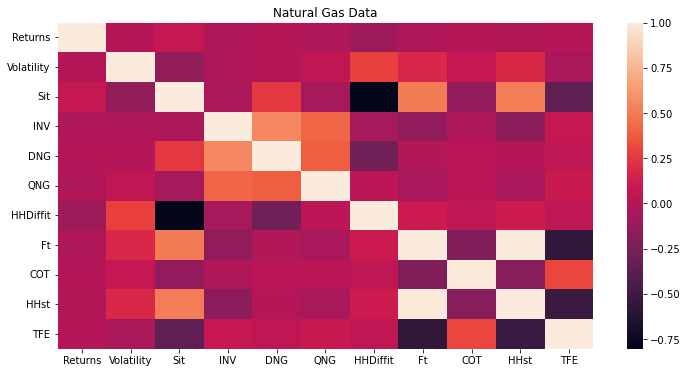

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(corrs)

plt.title('Natural Gas Data')
plt.plot()

In [10]:
df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'TFE', 'Unnamed: 13'],
      dtype='object')

In [134]:
type(df.Date)

pandas.core.series.Series

In [28]:
colsnew = ['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [29]:
dfnew = df.loc[:, colsnew]
dfnew

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,NaN,NaN,East,1/1/2010,7.66,769,174475.20,13475.00,-1.78,5.770,724087,5.88
1,-4.813032e-01,0.484173,East,1/8/2010,7.66,703,174475.20,13475.00,-1.10,5.818,760159,6.56
2,5.877867e-01,0.595347,East,1/15/2010,7.66,642,174475.20,13475.00,-1.98,5.610,782549,5.68
3,5.884050e-02,0.061240,East,1/22/2010,7.66,616,174475.20,13475.00,-2.10,5.625,769887,5.56
4,4.196420e-02,0.044199,East,1/29/2010,7.66,582,174475.20,13475.00,-2.19,5.350,782673,5.47
5,1.677563e-01,0.171219,East,2/5/2010,8.06,523,195992.00,15333.50,-2.59,5.448,775827,5.47
6,-3.137512e-02,0.029855,East,2/12/2010,8.06,471,195992.00,15333.50,-2.51,5.370,780477,5.55
7,5.427689e-02,0.056632,East,2/19/2010,8.06,425,195992.00,15333.50,-2.65,5.228,794836,5.41
8,1.854613e-01,0.189097,East,2/26/2010,8.06,390,195992.00,15333.50,-3.19,4.816,820300,4.87
9,-3.140000e-03,0.001340,East,3/5/2010,7.92,349,155059.00,16818.25,-3.18,4.664,853259,4.74


In [30]:
corrsnew = dfnew.corr()

[]

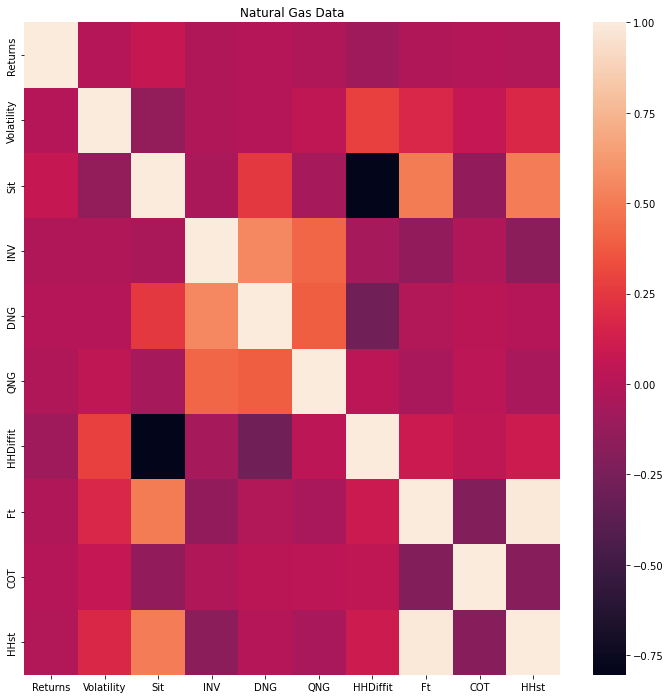

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(corrsnew)

plt.title('Natural Gas Data')
plt.plot()

In [ ]:
# 060822 - explain the difference between the correlation heatmaps.

In [135]:
dfnew.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
count,1825.000000,1825.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000
mean,-0.006612,0.230426,5.007738,559.764481,89909.475410,91564.290164,-1.519760,3.493694,1.055391e+06,3.487978
std,0.419628,0.355495,1.566180,348.303130,51761.103874,95923.960180,1.356882,0.872201,1.749606e+05,0.936041
min,-4.025352,0.000135,2.250000,80.000000,20309.200000,0.000000,-7.230000,1.687000,7.240870e+05,1.570000
25%,-0.112186,0.036834,3.980000,249.250000,46073.000000,4879.750000,-2.070000,2.772000,9.489800e+05,2.790000
50%,0.000000,0.103798,4.720000,482.500000,71874.750000,81122.500000,-1.120000,3.611500,1.019501e+06,3.540000
75%,0.093332,0.265059,5.720000,874.000000,131413.000000,132187.387500,-0.600000,4.172000,1.174981e+06,4.150000
max,3.465736,4.058148,11.350000,1370.000000,259140.250000,302955.500000,1.660000,5.975000,1.573733e+06,6.560000


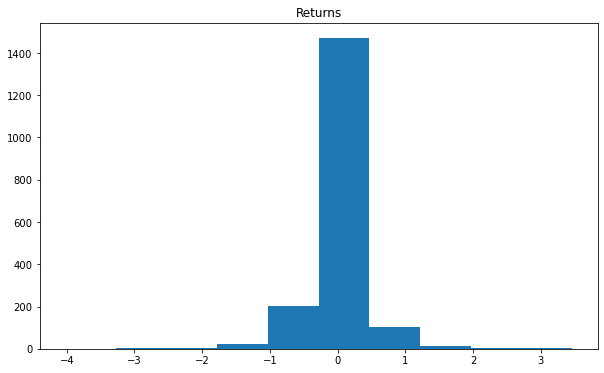

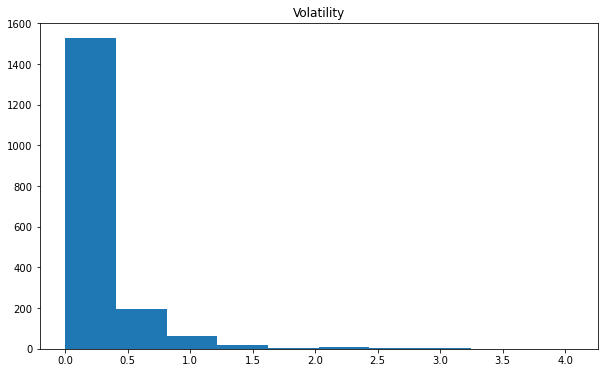

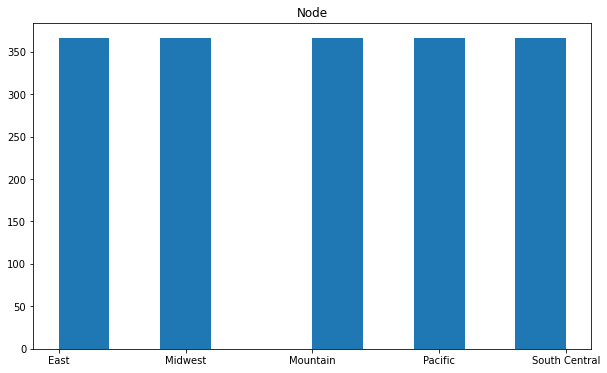

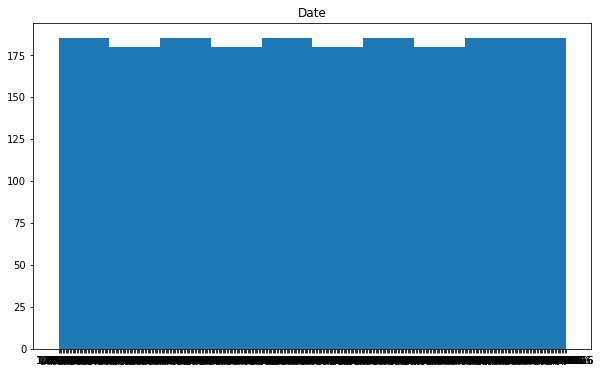

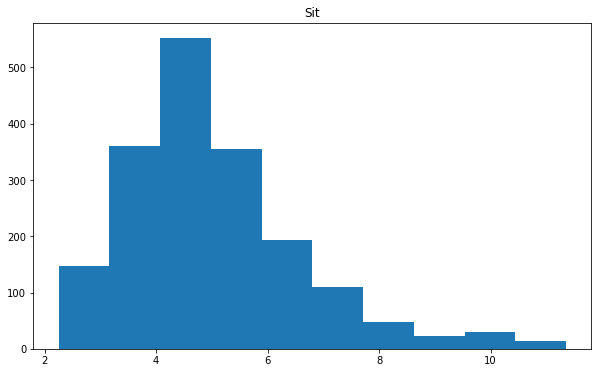

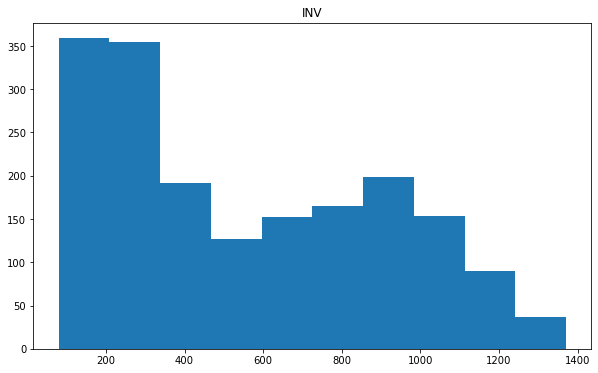

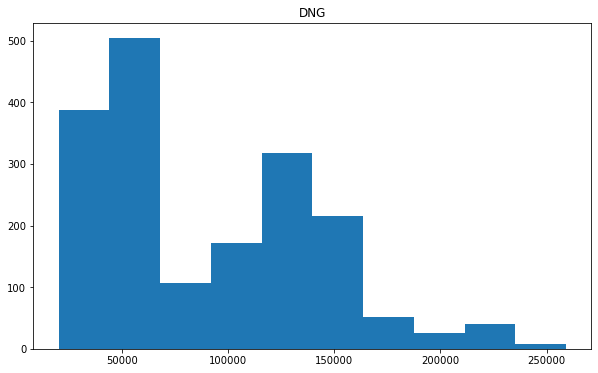

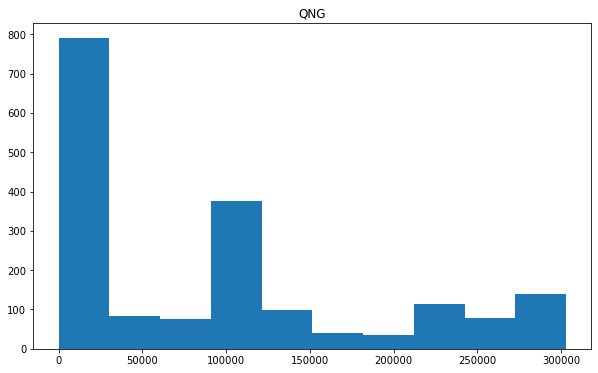

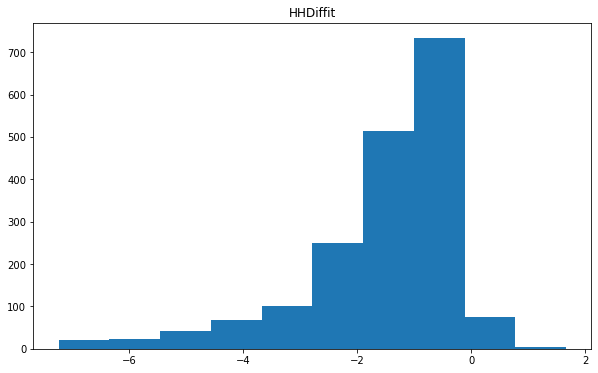

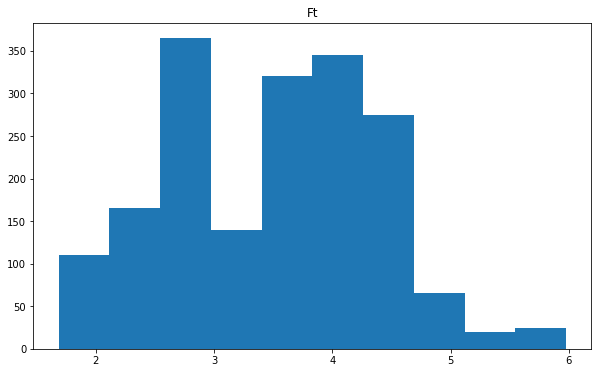

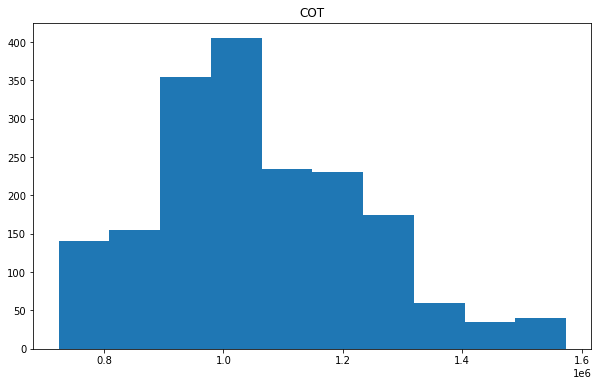

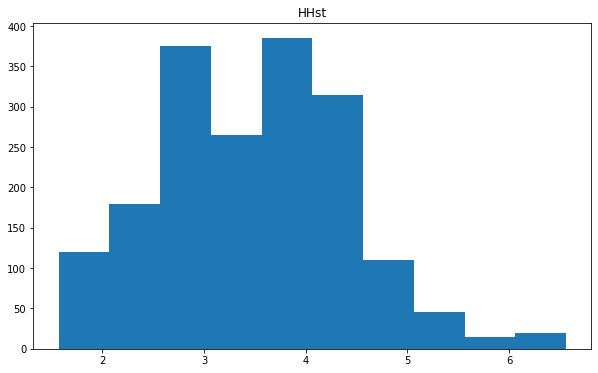

In [32]:
for col in dfnew.columns:
    plt.figure(figsize=(10,6))
    plt.hist(dfnew[col])
    plt.title(col)
    plt.show()
    print()

In [16]:
type(dfnew)

pandas.core.frame.DataFrame

In [46]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [50]:
# Question, how do I make the x-axis the date?

In [ ]:
# How do I split by node?

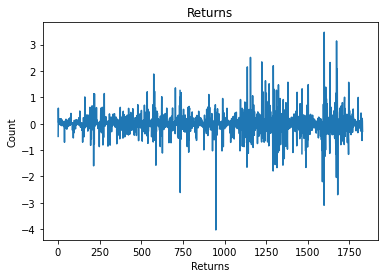

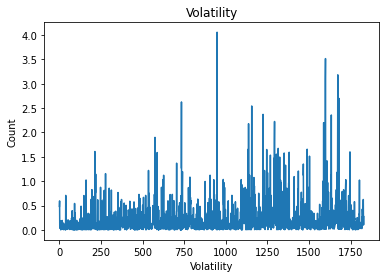

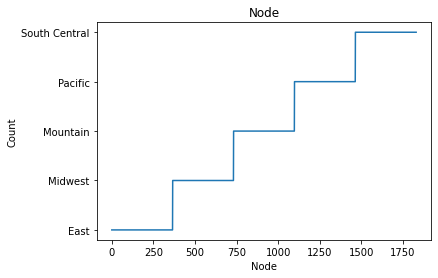

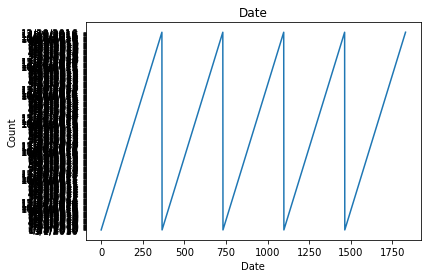

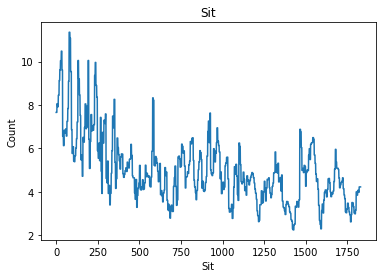

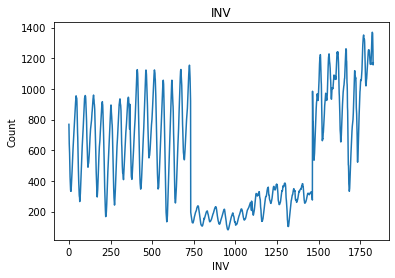

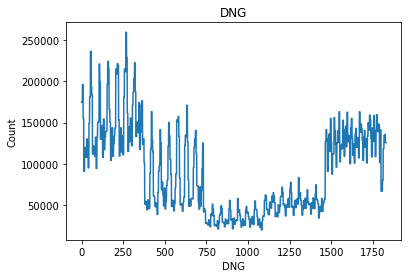

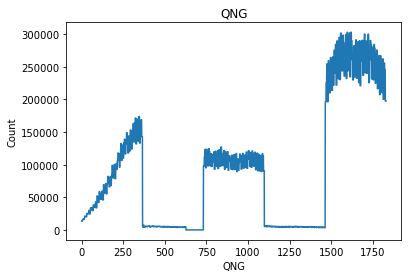

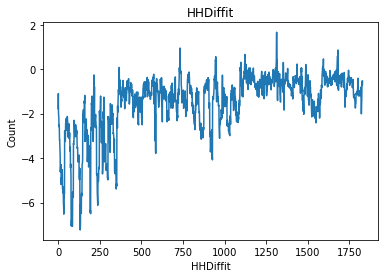

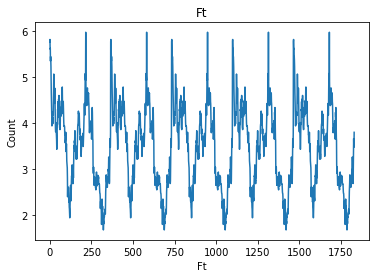

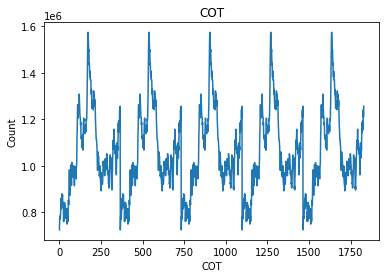

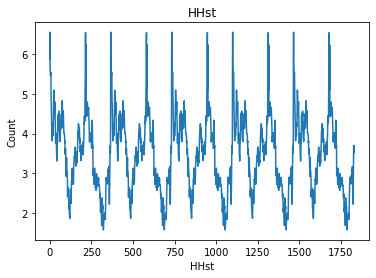

In [60]:
for col in dfnew.columns:    
    plt.plot(dfnew[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print()

In [ ]:
df2 = dfnew.groupby(['Date'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

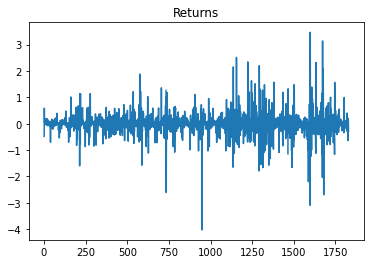

In [136]:
for col in dfnew.columns:    
    plt.plot(dfnew[col])
    plt.title(col)
    plt.xlabel(dfnew)
    plt.ylabel("Count")
    plt.show()
    print()

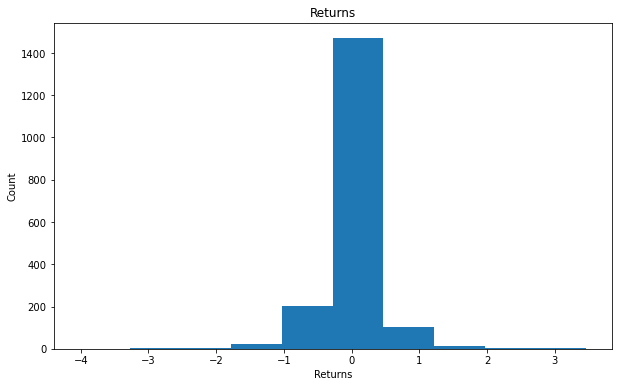

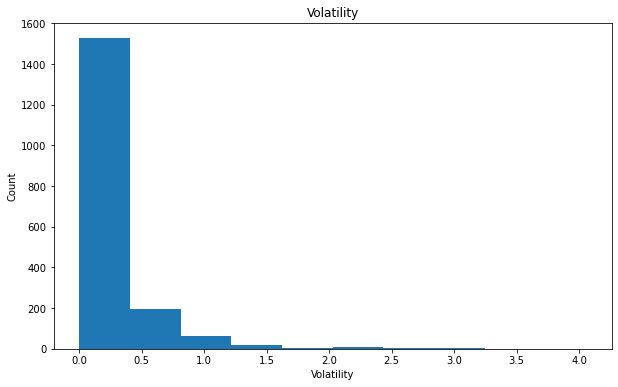

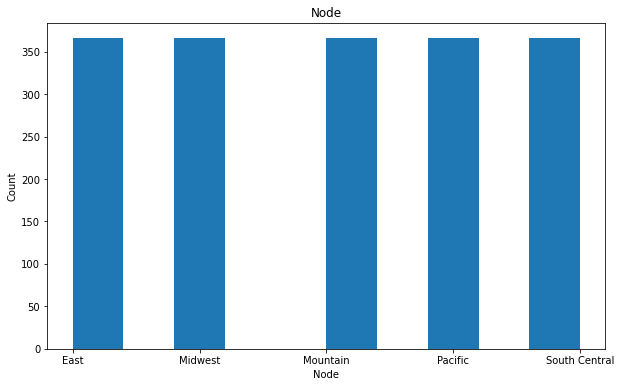

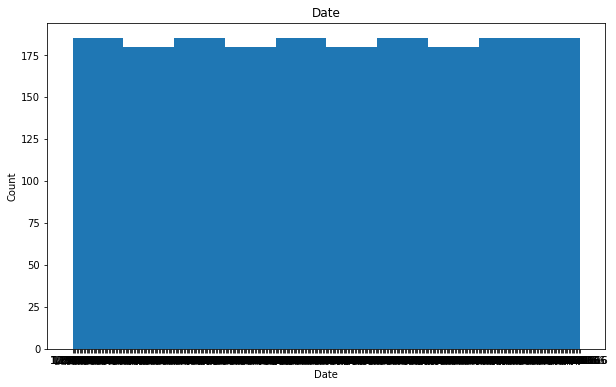

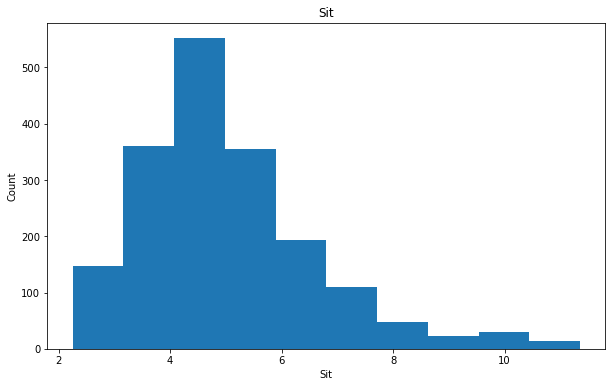

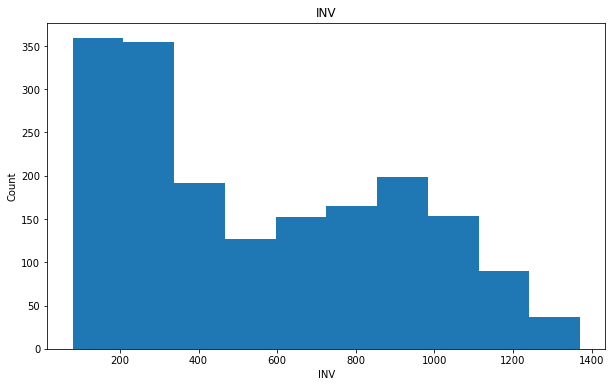

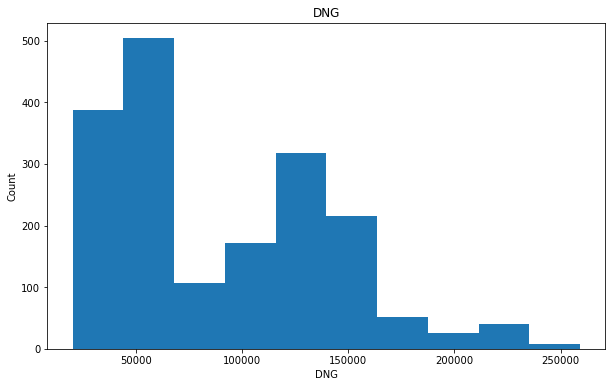

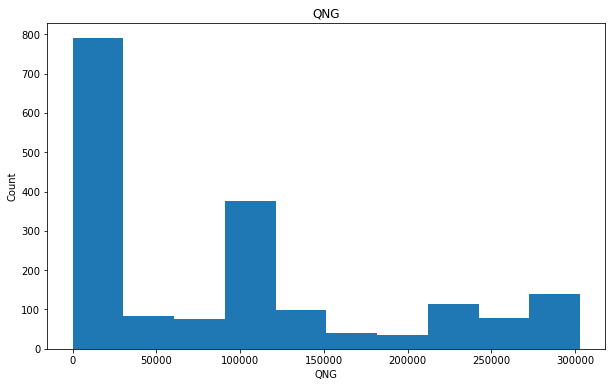

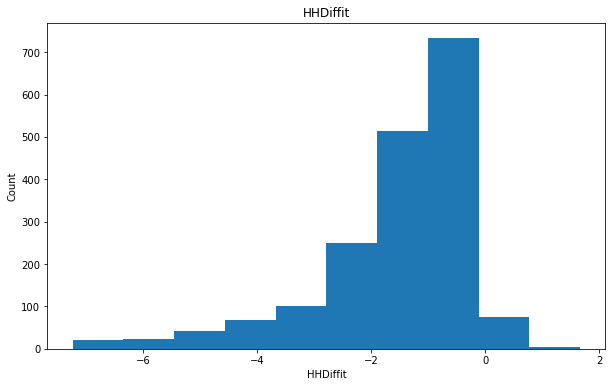

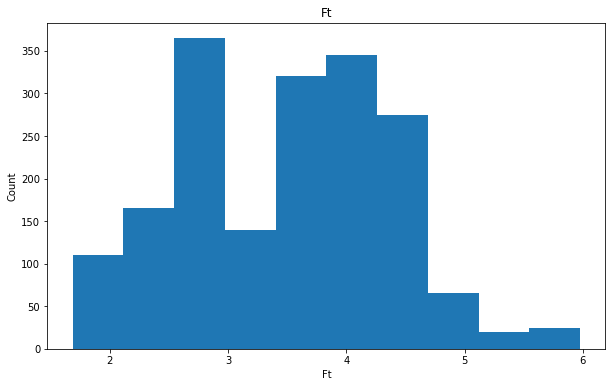

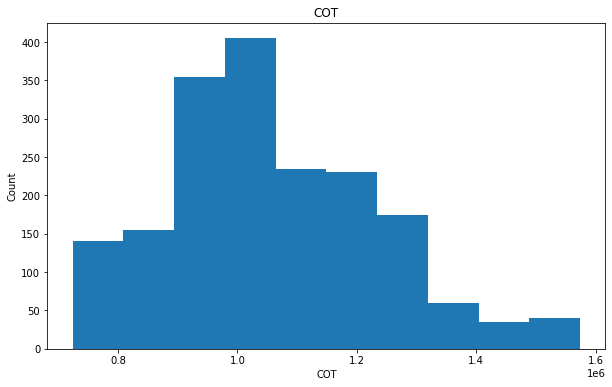

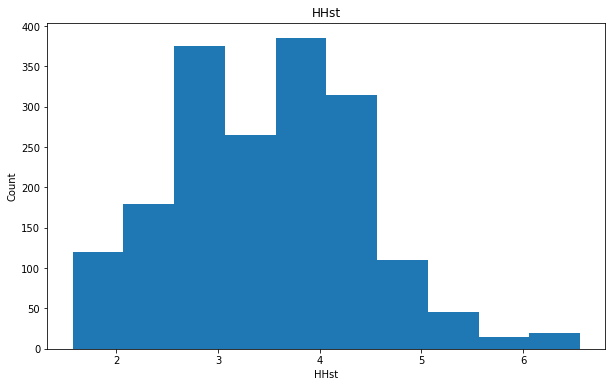

In [37]:
# To create the histograms
colsnew = ['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

for col in colsnew:
    plt.figure(figsize=(10,6))
    plt.hist(dfnew[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

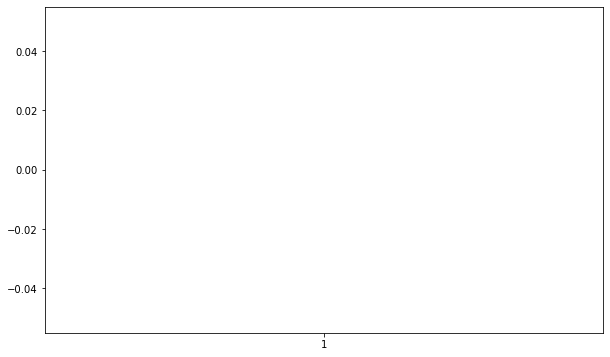

In [69]:
plt.figure(figsize=(10,6))
plt.boxplot(dfnew["Volatility"])
plt.ylabel
plt.show()

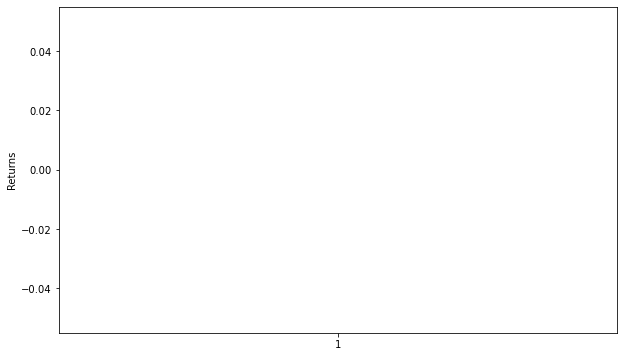

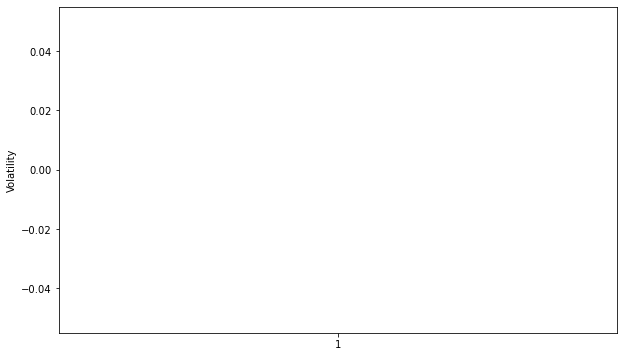

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

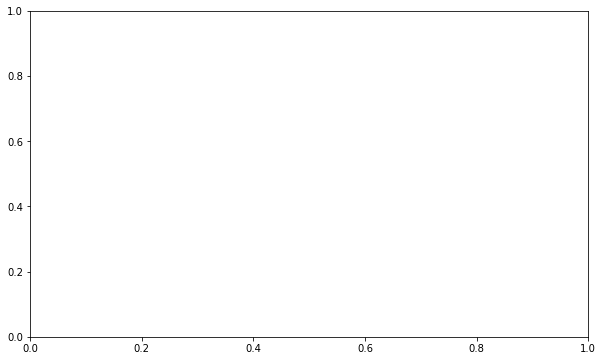

In [62]:
# to create a boxplot of all the columns in the dataset
for col in colsnew: 
    plt.figure(figsize=(10,6))
    plt.boxplot(dfnew[col], showmeans=True)
    plt.ylabel(col)
    plt.show()

In [20]:
# Ins_Preprocessing-jkeme_052922-video-review
# label encode NODE
# hOw do I handle "Date"?
# Which column(s) do I One-Hot Encode? Do I need to One-Hot Encode?
# pd.concat() to combine after breaking apart

In [38]:
# This for-loop-print looks for "string" types, prints the "columns" that are strings and the number of the different 
# categories within that column.
for col in dfnew.columns:
    if type(dfnew[col].values[0]) == str:
        print(col)
        print(dfnew[col].nunique())
        print()

Node
5

Date
366



In [39]:
# This for-loop-print looks for "numeric" types, prints the "columns" that are numeric and the number of the different 
# categories within that column.
for col in dfnew.columns:
    if type(dfnew[col].values[0]) != str:
        print(col)
        print(dfnew[col].nunique())
        print()

Returns
1474

Volatility
1640

Sit
288

INV
867

DNG
420

QNG
396

HHDiffit
480

Ft
341

COT
366

HHst
222



In [74]:
cols_num = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [75]:
cols_str = ['Node']

In [40]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [ ]:
dfnew.head(10)

In [ ]:
type(dfnew.Volatility)

In [58]:
# To create the histograms
colsnew = ['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

for col in colsnew:
    print(col)
    print(type(dfnew[col]))
    print()

Returns
<class 'pandas.core.series.Series'>

Volatility
<class 'pandas.core.series.Series'>

Node
<class 'pandas.core.series.Series'>

Date
<class 'pandas.core.series.Series'>

Sit
<class 'pandas.core.series.Series'>

INV
<class 'pandas.core.series.Series'>

DNG
<class 'pandas.core.series.Series'>

QNG
<class 'pandas.core.series.Series'>

HHDiffit
<class 'pandas.core.series.Series'>

Ft
<class 'pandas.core.series.Series'>

COT
<class 'pandas.core.series.Series'>

HHst
<class 'pandas.core.series.Series'>



In [79]:
# linear model, drop_first=True
# One Hot Encode, columns with less than 10 categories.
cols_oh = ["Node"]
df_oh = pd.get_dummies(dfnew.loc[:, cols_oh], drop_first=True)
df_oh.head(100)

,Node_Midwest,Node_Mountain,Node_Pacific,Node_South Central
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [81]:
df_oh.head(500)

,Node_Midwest,Node_Mountain,Node_Pacific,Node_South Central
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [82]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [83]:
dfnew.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
count,1825.000000,1825.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000
mean,-0.006612,0.230426,5.007738,559.764481,89909.475410,91564.290164,-1.519760,3.493694,1.055391e+06,3.487978
std,0.419628,0.355495,1.566180,348.303130,51761.103874,95923.960180,1.356882,0.872201,1.749606e+05,0.936041
min,-4.025352,0.000135,2.250000,80.000000,20309.200000,0.000000,-7.230000,1.687000,7.240870e+05,1.570000
25%,-0.112186,0.036834,3.980000,249.250000,46073.000000,4879.750000,-2.070000,2.772000,9.489800e+05,2.790000
50%,0.000000,0.103798,4.720000,482.500000,71874.750000,81122.500000,-1.120000,3.611500,1.019501e+06,3.540000
75%,0.093332,0.265059,5.720000,874.000000,131413.000000,132187.387500,-0.600000,4.172000,1.174981e+06,4.150000
max,3.465736,4.058148,11.350000,1370.000000,259140.250000,302955.500000,1.660000,5.975000,1.573733e+06,6.560000


In [84]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Date        1830 non-null   object 
 4   Sit         1830 non-null   float64
 5   INV         1830 non-null   int64  
 6   DNG         1830 non-null   float64
 7   QNG         1830 non-null   float64
 8   HHDiffit    1830 non-null   float64
 9   Ft          1830 non-null   float64
 10  COT         1830 non-null   int64  
 11  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 171.7+ KB


In [ ]:
# Complete: These are all numeric data points, there is no need to Label Encode anything
# In this dataset, Label Encode, columns less than 20 categories.
# cols_le = ["income", "education", 'occupation', "native-country"]
# df_le = df.loc[:, cols_le].apply(lambda x: LabelEncoder().fit_transform(x))
# df_le

In [85]:
cols_num = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']
df_num = df.loc[:, cols_num]
df_num.head()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,NaN,NaN,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88
1,-0.481303,0.484173,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56
2,0.587787,0.595347,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68
3,0.058840,0.061240,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56
4,0.041964,0.044199,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47


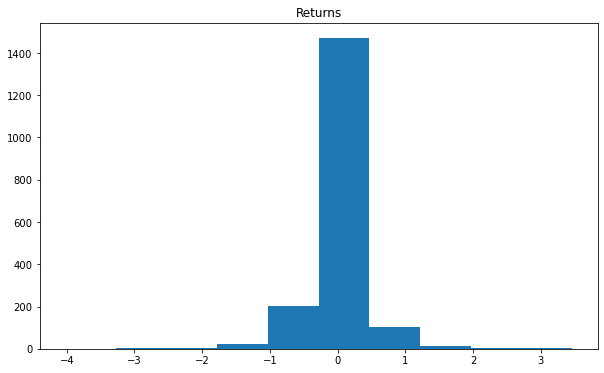

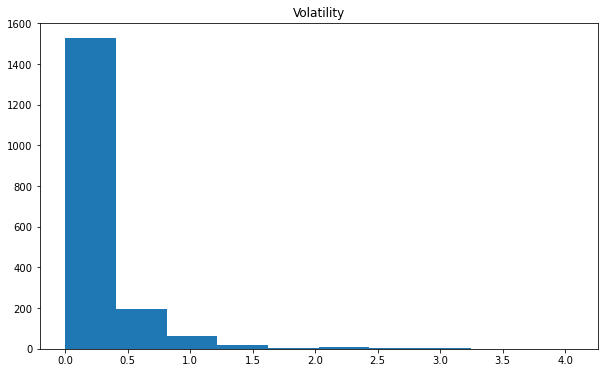

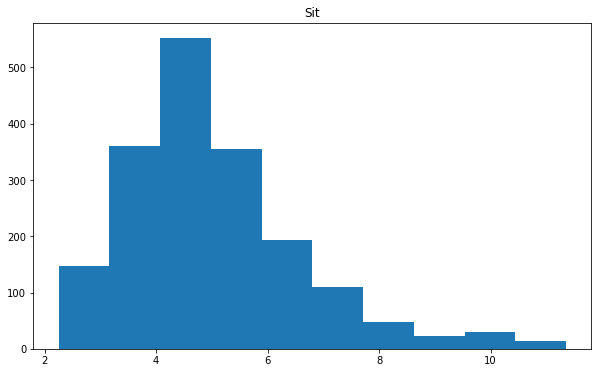

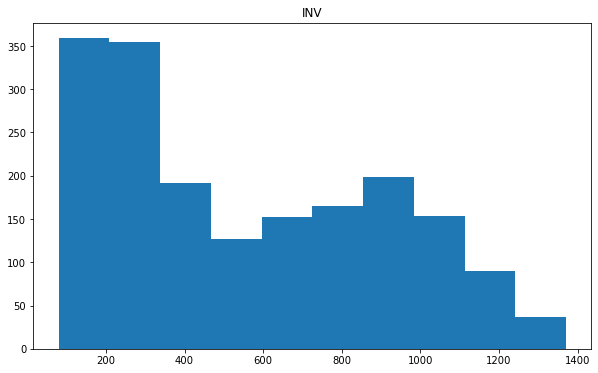

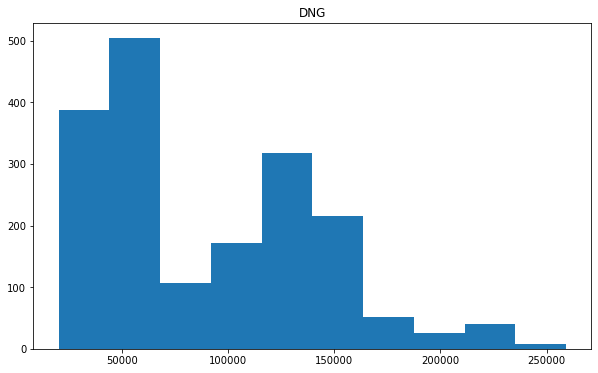

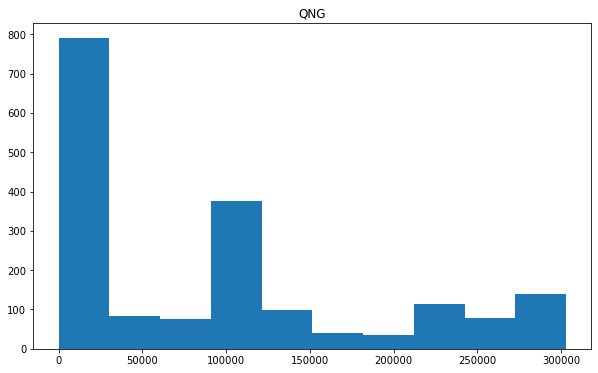

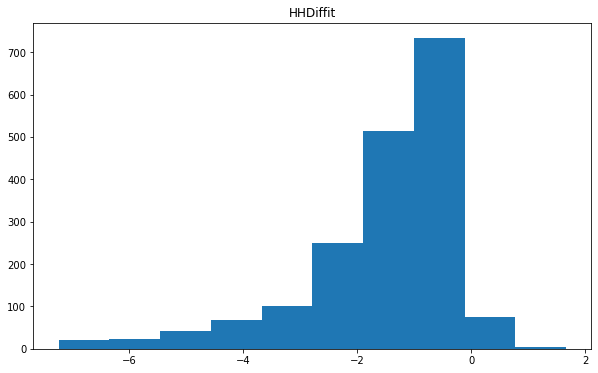

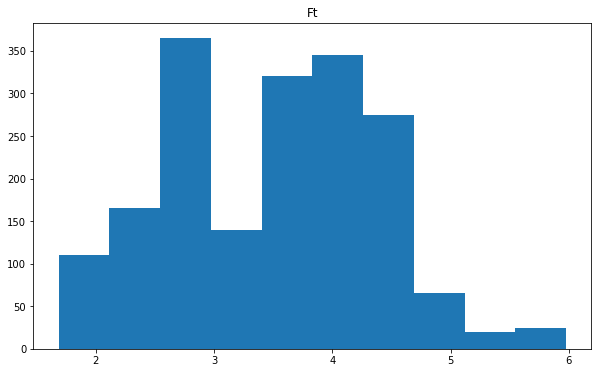

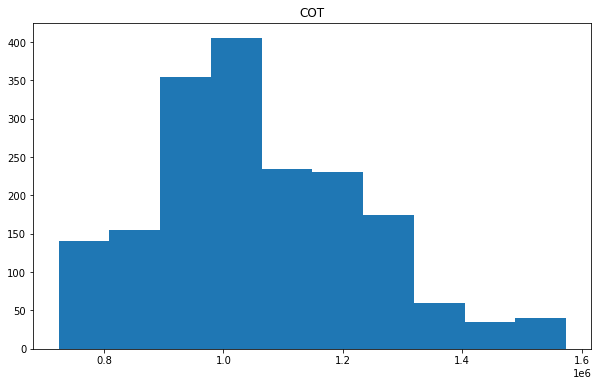

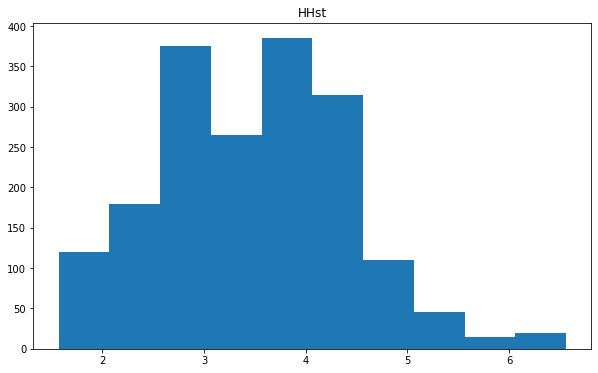

In [86]:
# Assists us in determining which columns we need to scale with standard scaling.
# 1)Large ranges 2) Histograms are not uniform.
for col in df_num.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()
    print()

In [ ]:
# First issue we ran into while data preparation/cleaning before model building with "TFE", Time Fixed Effects. 
# Time Fixed Effects, TFE, when included in model eliminates omitted variable bias caused by excluding unobserved features 
# that evolve over time but are constant across node/regions. The combined model allows to eliminate bias 
# from unobservables, feayures not included in the model, that change over time but are constant over 
# nodes and it controls for factors that differ across nodes but are constant over time.

In [ ]:
df.columns

In [ ]:
cols_tfe = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit','Ft', 'COT', 'HHst', 'TFE']

In [ ]:
# 06-04-22 Prof. Booth advises remove date, unique for every column.

In [ ]:
dftfe = df.loc[:, cols_tfe]
dftfe

In [ ]:
corrstfe = dftfe.corr()

In [ ]:
corrstfe

In [ ]:
# 06-04-22 Prof Booth, compare tree-based (remove TFE) to LM

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corrstfe)

plt.title('Natural Gas Data TFE')
plt.plot()

# 060822 What columns am I keeping?

In [87]:
df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'TFE', 'Unnamed: 13'],
      dtype='object')

In [88]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [99]:
# I am keeping these columns
colsB = ['Returns', 'Volatility', 'Node', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [100]:
dfB = dfnew.loc[:, colsB]

In [101]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Sit         1830 non-null   float64
 4   INV         1830 non-null   int64  
 5   DNG         1830 non-null   float64
 6   QNG         1830 non-null   float64
 7   HHDiffit    1830 non-null   float64
 8   Ft          1830 non-null   float64
 9   COT         1830 non-null   int64  
 10  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.4+ KB


In [102]:
dfB.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
count,1825.000000,1825.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000
mean,-0.006612,0.230426,5.007738,559.764481,89909.475410,91564.290164,-1.519760,3.493694,1.055391e+06,3.487978
std,0.419628,0.355495,1.566180,348.303130,51761.103874,95923.960180,1.356882,0.872201,1.749606e+05,0.936041
min,-4.025352,0.000135,2.250000,80.000000,20309.200000,0.000000,-7.230000,1.687000,7.240870e+05,1.570000
25%,-0.112186,0.036834,3.980000,249.250000,46073.000000,4879.750000,-2.070000,2.772000,9.489800e+05,2.790000
50%,0.000000,0.103798,4.720000,482.500000,71874.750000,81122.500000,-1.120000,3.611500,1.019501e+06,3.540000
75%,0.093332,0.265059,5.720000,874.000000,131413.000000,132187.387500,-0.600000,4.172000,1.174981e+06,4.150000
max,3.465736,4.058148,11.350000,1370.000000,259140.250000,302955.500000,1.660000,5.975000,1.573733e+06,6.560000


In [103]:
dfB.shape

(1830, 11)

In [104]:
dfB["Volatility"] = dfB.Volatility.astype(float)

In [105]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Sit         1830 non-null   float64
 4   INV         1830 non-null   int64  
 5   DNG         1830 non-null   float64
 6   QNG         1830 non-null   float64
 7   HHDiffit    1830 non-null   float64
 8   Ft          1830 non-null   float64
 9   COT         1830 non-null   int64  
 10  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.4+ KB


In [106]:
dfB.Volatility.describe()

count    1825.000000
mean        0.230426
std         0.355495
min         0.000135
25%         0.036834
50%         0.103798
75%         0.265059
max         4.058148
Name: Volatility, dtype: float64

In [107]:
type(dfB.Volatility)

pandas.core.series.Series

In [98]:
dfnew.Volatility.dtype

dtype('float64')

In [ ]:
# mask = df_sub.TotalCoinsMined > 0
# df_sub = df_sub.loc[mask].reset_index(drop=True)
# df_sub.info()

In [119]:
colsnew

['Returns',
 'Volatility',
 'Node',
 'Date',
 'Sit',
 'INV',
 'DNG',
 'QNG',
 'HHDiffit',
 'Ft',
 'COT',
 'HHst']

In [120]:
colsM = ['Returns',
 'Volatility',
 'Sit',
 'INV',
 'DNG',
 'QNG',
 'HHDiffit',
 'Ft',
 'COT',
 'HHst']

In [121]:
dfModel = dfnew.loc[:, colsM]

In [108]:
# rename all my columns
dfModel = dfB.rename(columns={"Returns":"Returns", "Volatility":"Volatility","Node":"Node","Sit":"Sit",
                             "INV":"INV", "DNG":"DNG", "QNG":"QNG",
                             "HHDiffit":"HHDiffit", "Ft":"Ft", "COT":"COT", "HHST":"HHST"})

In [109]:
# rename all my columns
dfB = dfB.rename(columns={"Returns":"Returns", "Volatility":"Volatility","Node":"Node","Sit":"Sit",
                             "INV":"INV", "DNG":"DNG", "QNG":"QNG",
                             "HHDiffit":"HHDiffit", "Ft":"Ft", "COT":"COT", "HHST":"HHST"})

In [113]:
dfModel.head()

,Returns,Volatility,Node,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,NaN,NaN,East,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88
1,-0.481303,0.484173,East,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56
2,0.587787,0.595347,East,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68
3,0.058840,0.061240,East,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56
4,0.041964,0.044199,East,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47


In [ ]:
dfModel.describe()

In [112]:
dfModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Sit         1830 non-null   float64
 4   INV         1830 non-null   int64  
 5   DNG         1830 non-null   float64
 6   QNG         1830 non-null   float64
 7   HHDiffit    1830 non-null   float64
 8   Ft          1830 non-null   float64
 9   COT         1830 non-null   int64  
 10  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.4+ KB


In [111]:
dfModel.Volatility = pd.to_numeric(df['Volatility'])

In [114]:
dfB = dfB.fillna(value=0).reset_index(drop=True)
dfB.head()

,Returns,Volatility,Node,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,0.000000,0.000000,East,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88
1,-0.481303,0.484173,East,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56
2,0.587787,0.595347,East,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68
3,0.058840,0.061240,East,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56
4,0.041964,0.044199,East,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47


In [ ]:
dfB.Volatility = pd.to_numeric(dfB['Volatility'])

In [123]:
dfModel = dfModel.fillna(value=0).reset_index(drop=True)
dfB.head()

,Returns,Volatility,Node,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,0.000000,0.000000,East,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88
1,-0.481303,0.484173,East,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56
2,0.587787,0.595347,East,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68
3,0.058840,0.061240,East,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56
4,0.041964,0.044199,East,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47


In [124]:
# Combine all the columns back into one dataframe
df_clean = pd.concat([dfModel, df_oh], axis=1)
df_clean.head()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,Node_Midwest,Node_Mountain,Node_Pacific,Node_South Central
0,0.000000,0.000000,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,0,0,0,0
1,-0.481303,0.484173,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,0,0,0,0
2,0.587787,0.595347,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,0,0,0,0
3,0.058840,0.061240,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,0,0,0,0
4,0.041964,0.044199,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,0,0,0,0


In [125]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(df_clean.corr()["HHst"]).sort_values(ascending=False)

HHst                  1.000000e+00
Ft                    9.820863e-01
Sit                   5.074880e-01
COT                   1.843811e-01
Volatility            1.715410e-01
INV                   1.684768e-01
HHDiffit              1.040791e-01
QNG                   5.354408e-02
Returns               9.858435e-03
DNG                   2.130041e-03
Node_Pacific          1.408627e-15
Node_Midwest          1.407320e-15
Node_South Central    1.099453e-15
Node_Mountain         9.073105e-16
Name: HHst, dtype: float64

In [ ]:
dfModel = dfModel.fillna(value=0).reset_index(drop=True)
dfB.head()

In [128]:
df_num.head()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,NaN,NaN,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88
1,-0.481303,0.484173,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56
2,0.587787,0.595347,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68
3,0.058840,0.061240,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56
4,0.041964,0.044199,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47


In [129]:
dfModel.head()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,0.000000,0.000000,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88
1,-0.481303,0.484173,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56
2,0.587787,0.595347,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68
3,0.058840,0.061240,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56
4,0.041964,0.044199,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47


In [130]:
# scaler
scaler = StandardScaler().fit(dfModel)
df_scale = pd.DataFrame(scaler.transform(dfModel), columns=dfModel.columns)
df_scale.head()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,0.015740,-0.647103,1.693922,0.600892,1.634216,-0.814297,-0.191845,2.610555,-1.894109,2.556166
1,-1.133121,0.716321,1.693922,0.411351,1.634216,-0.814297,0.309440,2.665603,-1.687881,3.282828
2,1.418775,1.029385,1.693922,0.236168,1.634216,-0.814297,-0.339282,2.427061,-1.559874,2.342442
3,0.156191,-0.474651,1.693922,0.161500,1.634216,-0.814297,-0.427745,2.444264,-1.632264,2.214207
4,0.115908,-0.522638,1.693922,0.063857,1.634216,-0.814297,-0.494091,2.128883,-1.559165,2.118031


In [131]:
# no scaler
df_no_scale = dfModel.copy()
df_no_scale.head()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst
0,0.000000,0.000000,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88
1,-0.481303,0.484173,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56
2,0.587787,0.595347,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68
3,0.058840,0.061240,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56
4,0.041964,0.044199,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47


In [133]:
# no scale training set
df_train_ns = pd.concat([df_no_scale, df_oh], axis=1)
df_train_ns["Returns"] = train_df.Returns
df_train_ns.head()

NameError: name 'train_df' is not defined

In [ ]:

# First issue we ran into while data preparation/cleaning before model building with "TFE", Time Fixed Effects. 
# Time Fixed Effects, TFE, when included in model eliminates omitted variable bias caused by excluding unobserved features 
# that evolve over time but are constant across node/regions. The combined model allows to eliminate bias 
# from unobservables, feayures not included in the model, that change over time but are constant over 
# nodes and it controls for factors that differ across nodes but are constant over time.
df.columns
cols_tfe = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit','Ft', 'COT', 'HHst', 'TFE']
e
# 06-04-22 Prof. Booth advises remove date, unique for every column.
dftfe = df.loc[:, cols_tfe]
dftfe
corrstfe = dftfe.corr()
corrstfe
# 06-04-22 Prof Booth, compare tree-based (remove TFE) to LM
plt.figure(figsize=(12,12))
sns.heatmap(corrstfe)
​
plt.title('Natural Gas Data TFE')
plt.plot()